In [2]:
import warnings

warnings.filterwarnings("ignore")

Defining the default font sizes to make the figures prettier

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Directory - to save the images in high-resolution

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### From Biological to Artificial Neurons

**The Perceptron**

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [6]:
y_pred

array([ True, False])

The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1,
                        random_state=42)

sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

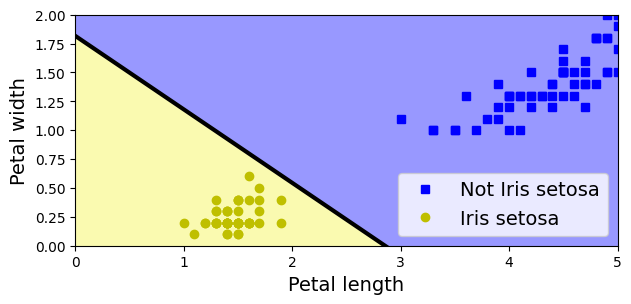

In [8]:
# plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

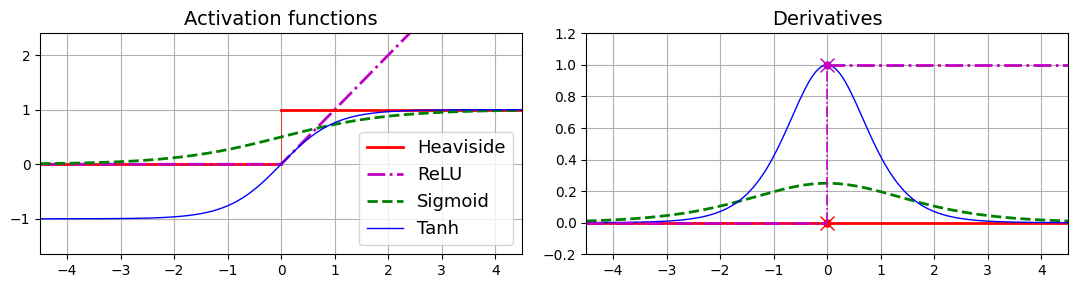

In [9]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

### Regression MLPs

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.5053326657968679

### Classification MLPs

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

### Implementing MLPs with Keras

**Building an Image Classifier Using the Sequential API**

Using Keras to load the dataset

The dataset is already split between a training_set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set.

55,000 images - for training
5,000 images - for validation

In [12]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28 x 28 pixels:

In [13]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [14]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [15]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

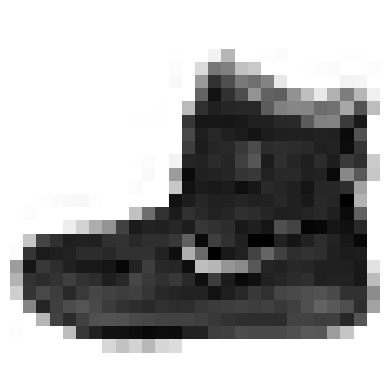

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [17]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

The corresponding class names:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [19]:
class_names[y_train[0]]

'Ankle Boot'

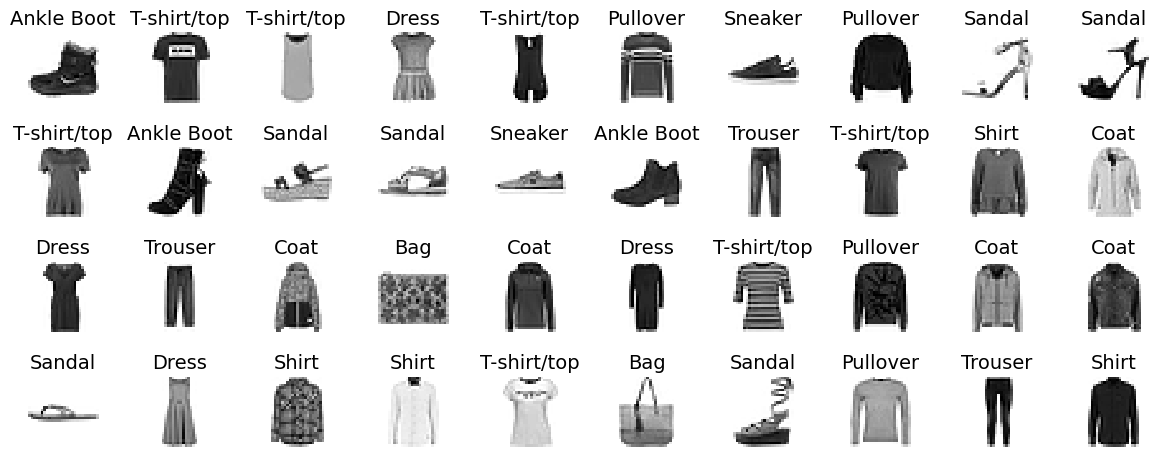

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

### Creating the model using the Sequential API

In [21]:
tf.random.set_seed(42)
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [22]:
# clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


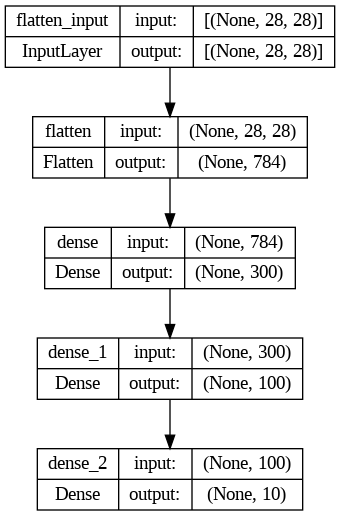

In [24]:
# another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [25]:
model.layers

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer('dense') is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01177717,  0.05283919,  0.01894163, ...,  0.05925311,
        -0.05302088,  0.05864275],
       [ 0.02932365, -0.0008584 ,  0.02169847, ..., -0.00340274,
        -0.06941385,  0.00662988],
       [ 0.06836274, -0.03153122, -0.00777457, ..., -0.05256847,
        -0.00278864, -0.03963261],
       ...,
       [-0.05491421, -0.0222405 ,  0.0177541 , ..., -0.01358665,
         0.01197917,  0.01100373],
       [ 0.00228795,  0.05244796,  0.03448487, ..., -0.00721042,
         0.03518364, -0.03264425],
       [ 0.007892  ,  0.01273017,  0.06017397, ..., -0.01100485,
         0.01873259,  0.05390173]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

### Compiling the model

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [33]:
# shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample

In [34]:
# shows how to convert one-hot vectors to class ids
np.argmax([
    [1., 0., 0., 0., 0., 0., 0., 0., 0., 0. ],
    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0. ],
    [0., 1., 0., 0., 0., 0., 0., 0., 0., 0. ],
    [1., 0., 0., 0., 0., 0., 0., 0., 0., 0. ]],
    axis=1
)

array([0, 5, 1, 0])

### Training and Evaluating the model

In [35]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7356 - accuracy: 0.7570 - val_loss: 0.5090 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4868 - accuracy: 0.8306 - val_loss: 0.4669 - val_accuracy: 0.8306
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4385 - accuracy: 0.8454 - val_loss: 0.4232 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4125 - accuracy: 0.8553 - val_loss: 0.3980 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3914 - accuracy: 0.8623 - val_loss: 0.3870 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3752 - accuracy: 0.8669 - val_loss: 0.3843 - val_accuracy: 0.8632
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3625 - accuracy: 0.8707 - val_loss: 0.3725 - val_accuracy

In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [37]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


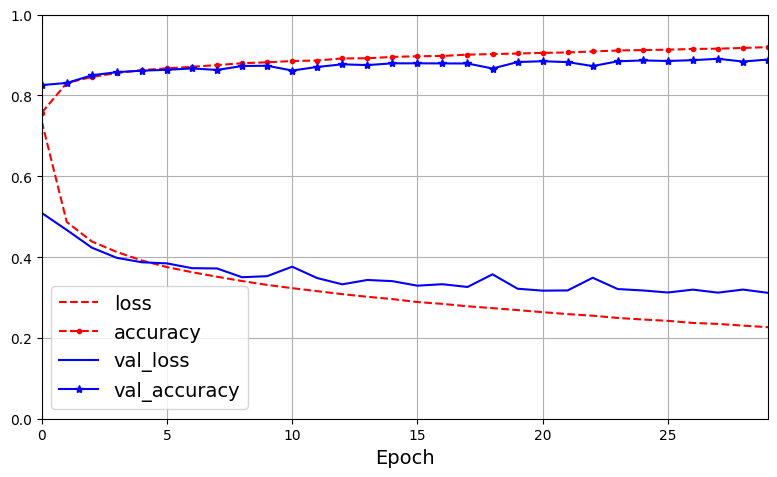

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  
save_fig("keras_learning_curves_plot")  
plt.show()

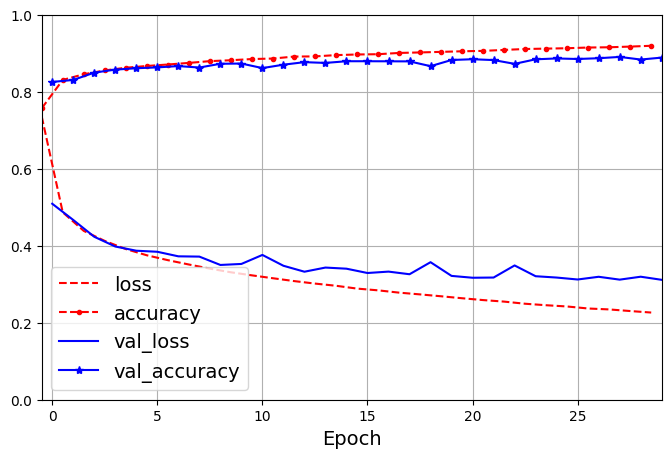

In [39]:
# shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8849


[0.3246600925922394, 0.8848999738693237]

### Using the model to make predictions

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 92ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [43]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

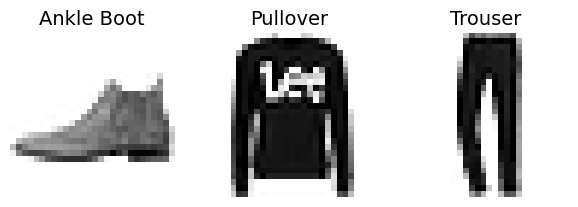

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### Building a Regression MLP Using the Sequential API

In [46]:
# load ans split the California housing dataset
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [47]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.7548 - root_mean_squared_error: 0.8688 - val_loss: 0.4254 - val_root_mean_squared_error: 0.6523
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3784 - root_mean_squared_error: 0.6151 - val_loss: 2.1079 - val_root_mean_squared_error: 1.4519
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3712 - root_mean_squared_error: 0.6093 - val_loss: 0.3333 - val_root_mean_squared_error: 0.5773
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3418 - root_mean_squared_error: 0.5846 - val_loss: 0.9693 - val_root_mean_squared_error: 0.9845
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3308 - root_mean_squared_error: 0.5752 - val_loss: 2.2814 - val_root_mean_squared_error: 1.5104
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3358 - root_mean_squared_error: 0.5795 - val_loss: 0.7321 - val_

In [48]:
rmse_test

0.5306400656700134

In [49]:
y_pred

array([[0.5284458],
       [0.6982111],
       [5.091953 ]], dtype=float32)

### Building Complex Models using the Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs.

For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer

In [50]:
# extra code - reset the name counters and make the code reproducible

tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [51]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.1719 - root_mean_squared_error: 1.0826 - val_loss: 1.3078 - val_root_mean_squared_error: 1.1436
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4366 - root_mean_squared_error: 0.6607 - val_loss: 1.5008 - val_root_mean_squared_error: 1.2251
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3943 - root_mean_squared_error: 0.6279 - val_loss: 0.6396 - val_root_mean_squared_error: 0.7998
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3716 - root_mean_squared_error: 0.6096 - val_loss: 0.7426 - val_root_mean_squared_error: 0.8618
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3648 - root_mean_squared_error: 0.6040 - val_loss: 1.7291 - val_root_mean_squared_error: 1.3149
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3618 - root_mean_squared_error: 0.6015 - val_loss: 1.3226 - val_

In [54]:
tf.random.set_seed(42)  

In [55]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.3184 - root_mean_squared_error: 1.1482 - val_loss: 4.2548 - val_root_mean_squared_error: 2.0627
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4908 - root_mean_squared_error: 0.7006 - val_loss: 1.9720 - val_root_mean_squared_error: 1.4043
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4231 - root_mean_squared_error: 0.6504 - val_loss: 0.4362 - val_root_mean_squared_error: 0.6604
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3894 - root_mean_squared_error: 0.6240 - val_loss: 0.4159 - val_root_mean_squared_error: 0.6449
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3752 - root_mean_squared_error: 0.6125 - val_loss: 0.5878 - val_root_mean_squared_error: 0.7667
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3642 - root_mean_squared_error: 0.6035 - val_loss: 0.4615 - val_

Adding an auxiliary output for regularization:

In [57]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [58]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [60]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 1.6947 - dense_2_loss: 1.5865 - dense_3_loss: 2.6688 - dense_2_root_mean_squared_error: 1.2596 - dense_3_root_mean_squared_error: 1.6336 - val_loss: 1.2543 - val_dense_2_loss: 0.9746 - val_dense_3_loss: 3.7717 - val_dense_2_root_mean_squared_error: 0.9872 - val_dense_3_root_mean_squared_error: 1.9421
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5564 - dense_2_loss: 0.5199 - dense_3_loss: 0.8847 - dense_2_root_mean_squared_error: 0.7210 - dense_3_root_mean_squared_error: 0.9406 - val_loss: 0.6735 - val_dense_2_loss: 0.5845 - val_dense_3_loss: 1.4744 - val_dense_2_root_mean_squared_error: 0.7645 - val_dense_3_root_mean_squared_error: 1.2142
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4769 - dense_2_loss: 0.4560 - dense_3_loss: 0.6647 - dense_2_root_mean_squared_error: 0.6753 - dense_3_root_mean_squared_error: 0.8153 - val_loss: 0.5136 - val_dense_2_loss

In [61]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 3ms/step - loss: 0.3414 - dense_2_loss: 0.3333 - dense_3_loss: 0.4136 - dense_2_root_mean_squared_error: 0.5774 - dense_3_root_mean_squared_error: 0.6431


In [62]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 113ms/step


In [63]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_predd = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 23ms/step


### Using the Subclassing API to Build Dynamic Models

In [64]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide = tf.keras.layers.Normalization()
    self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)

  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)

    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 1.3162 - output_1_loss: 1.2144 - output_2_loss: 2.2325 - output_1_root_mean_squared_error: 1.1020 - output_2_root_mean_squared_error: 1.4942 - val_loss: 1.7919 - val_output_1_loss: 0.8738 - val_output_2_loss: 10.0540 - val_output_1_root_mean_squared_error: 0.9348 - val_output_2_root_mean_squared_error: 3.1708
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5041 - output_1_loss: 0.4580 - output_2_loss: 0.9194 - output_1_root_mean_squared_error: 0.6767 - output_2_root_mean_squared_error: 0.9589 - val_loss: 1.0234 - val_output_1_loss: 0.6042 - val_output_2_loss: 4.7964 - val_output_1_root_mean_squared_error: 0.7773 - val_output_2_root_mean_squared_error: 2.1901
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4468 - output_1_loss: 0.4235 - output_2_loss: 0.6570 - output_1_root_mean_squared_error: 0.6508 - output_2_root_mean_squared_error: 0.8106 - val_loss: 0.56

1/1 [==============================] - 0s 94ms/step


### Saving and Restoring a Model

In [66]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [67]:
model.save("my_keras_model", save_format="tf")

In [68]:
# show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [69]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 82ms/step


In [70]:
model.save_weights("my_weights")

In [71]:
model.load_weights("my_weights")

In [72]:
# show the list of my_weights.* files
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


### Using Callbacks

In [73]:
shutil.rmtree("my_checkpoints", ignore_errors=True) 

In [74]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 4s 6ms/step - loss: 0.3604 - output_1_loss: 0.3526 - output_2_loss: 0.4310 - output_1_root_mean_squared_error: 0.5938 - output_2_root_mean_squared_error: 0.6565 - val_loss: 1.8434 - val_output_1_loss: 1.9912 - val_output_2_loss: 0.5128 - val_output_1_root_mean_squared_error: 1.4111 - val_output_2_root_mean_squared_error: 0.7161
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3641 - output_1_loss: 0.3578 - output_2_loss: 0.4206 - output_1_root_mean_squared_error: 0.5982 - output_2_root_mean_squared_error: 0.6485 - val_loss: 2.7857 - val_output_1_loss: 2.8685 - val_output_2_loss: 2.0406 - val_output_1_root_mean_squared_error: 1.6937 - val_output_2_root_mean_squared_error: 1.4285
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3818 - output_1_loss: 0.3764 - output_2_loss: 0.4299 - output_1_root_mean_squared_error: 0.6135 - output_2_root_mean_squared_error: 0.6557 - val_loss: 2.184

In [75]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3389 - output_1_loss: 0.3329 - output_2_loss: 0.3932 - output_1_root_mean_squared_error: 0.5770 - output_2_root_mean_squared_error: 0.6271 - val_loss: 1.4064 - val_output_1_loss: 1.5088 - val_output_2_loss: 0.4842 - val_output_1_root_mean_squared_error: 1.2283 - val_output_2_root_mean_squared_error: 0.6958
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3405 - output_1_loss: 0.3352 - output_2_loss: 0.3885 - output_1_root_mean_squared_error: 0.5790 - output_2_root_mean_squared_error: 0.6233 - val_loss: 1.5660 - val_output_1_loss: 1.6454 - val_output_2_loss: 0.8510 - val_output_1_root_mean_squared_error: 1.2827 - val_output_2_root_mean_squared_error: 0.9225
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3481 - output_1_loss: 0.3434 - output_2_loss: 0.3903 - output_1_root_mean_squared_error: 0.5860 - output_2_root_mean_squared_error: 0.6247 - val_loss: 0.

In [76]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    ratio = logs["val_loss"] / logs["loss"]
    print(f"Epochhs={epoch}, val/train={ratio:.2f}")

In [77]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epochhs=0, val/train=1.20
Epochhs=1, val/train=1.02
Epochhs=2, val/train=1.60
Epochhs=3, val/train=5.39
Epochhs=4, val/train=8.29
Epochhs=5, val/train=2.06
Epochhs=6, val/train=2.87
Epochhs=7, val/train=3.02
Epochhs=8, val/train=5.22
Epochhs=9, val/train=2.35


### Fine-Tuning Neural Network Hyperparameters

Dataset: Fashion MNIST

In [78]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [79]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [80]:
import sys

if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 20.1 MB/s eta 0:00:00


In [81]:
import keras_tuner as kt

def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
  n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                           sampling="log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())

  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                metrics=["accuracy"])

  return model

Using TensorFlow backend


In [82]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 06s]
val_accuracy: 0.8388000130653381

Best val_accuracy So Far: 0.8637999892234802
Total elapsed time: 00h 07m 02s


In [83]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [84]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values   # best hyperparameter values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [85]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8637999892234802


In [86]:
best_trial.metrics.get_last_value("val_accuracy")

0.8637999892234802

In [87]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3611 - accuracy: 0.8695
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3546 - accuracy: 0.8715
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3449 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3412 - accuracy: 0.8763
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3348 - accuracy: 0.8782
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3303 - accuracy: 0.8795
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3238 - accuracy: 0.8820
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3200 - accuracy: 0.8824
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3152 - accuracy: 0.8842
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4

In [88]:
class MyClassificationHyperModel(kt.HyperModel):
  def build(self, hp):
    return build_model(hp)

  def fit(self, hp, model, X, y, **kwargs):
    if hp.Boolean("normalize"):
      norm_layer = tf.keras.layers.Normalization()
      X = norm_layer(X)

      return model.fit(X, y, **kwargs)

In [89]:
hyperband_tuner = kt.Hyperband(
  MyClassificationHyperModel(), objective="val_accuracy", seed=42    ,
  max_epochs=10, factor=3, hyperband_iterations=2,
  overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [90]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
5                 |5                 |n_hidden
25                |25                |n_neurons
0.00065625        |0.00065625        |learning_rate
sgd               |sgd               |optimizer
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round



FatalTypeError: ignored

In [ ]:
bayesian_opt_tuner = kt.BayesianOptimization(
  MyClassificationHyperModel(), objective="val_accuracy", seed=42    ,
  max_epochs=10, alpha=1e-4, beta=2.6,
  overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")

bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])